# Project: The Movie Database(TMDb) Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be analysing The Movie Database (TMDb) data which is associated with different type of genre, cast & crew, revenue & budget, popularity & public ratings etc. Primarily, we’ll be looking at genre, popularity, revenue and ratings, to analyse how they are related and what are their impacts on each other. For this project pandas, numpy, matplotlib and seaborn libraries are used along with matplotlib's inline function. 
>
>This are few questions which we will try to find answers:
>Which genres are most popular from year to year? 
>What kinds of properties are associated with movies that have high revenues?
>Is there a relationship between popularity and revenue?



In [1]:
#Importing Require Libraries.
#Applying built in matplotlib inline function to view plots inside the same notebook.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section we will explore the errors, missing data

### General Properties

In [2]:
# Loading data using pandas read csv function.
df = pd.read_csv('tmdb-movies.csv')

In [3]:
#Viewing the dimensions of data loaded
df.shape

(10866, 21)

In [4]:
#Fetching top 5 rows of the dataset.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#statistical calculations of dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Learning about the different data types. 
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
# Finding Null values in each column of the dataset.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

>A few columns like homepage, id, imdp_id, overview, tagline can be dropped as they are not required in this project.

> Null values were found and they will be dropped using dropna function, though we can calculate mode and replace the missing values with mode value or top 5 values in few cases but we can't predict the correct cast, director, keywords, genres and production companies for each movie. For eg: if the movie is in action genre and mode value is drama and comedy (calculated the mode) then there will incorrect data, the same reason is for dropping other the na values.

## Data Pre-Processing
> In this section the above changes will take place.

In [8]:
# Dropping some columns as they won't be used for analysis. 
df.drop(['id','homepage','imdb_id','overview','tagline'], axis = 1, inplace = True)

In [9]:
# Checking Null values after dropping columns.
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.3+ MB


In [11]:
# Handling the null values in dataset by dropping them. 
df.dropna(inplace = True)

In [12]:
# Confirming the above update. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 0 to 10865
Data columns (total 16 columns):
popularity              8667 non-null float64
budget                  8667 non-null int64
revenue                 8667 non-null int64
original_title          8667 non-null object
cast                    8667 non-null object
director                8667 non-null object
keywords                8667 non-null object
runtime                 8667 non-null int64
genres                  8667 non-null object
production_companies    8667 non-null object
release_date            8667 non-null object
vote_count              8667 non-null int64
vote_average            8667 non-null float64
release_year            8667 non-null int64
budget_adj              8667 non-null float64
revenue_adj             8667 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.1+ MB


In [31]:
# Fetching Top 5 rows of the dataset 
df['cast'].iloc[:2]

0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
Name: cast, dtype: object

> In the above section we made the changes which were reported in the Data Wrangling section. <br>
> The below function can be used to clean the multiple values in a column, in our case it is genres. This function was not used as the questions didn't addressed using this kind of values.  

def splt_multival_col(df, col_name):

    # we can split by any other value instead of |
    splited_df = df[col_name].str.split('|')
    
    # taking column names
    name_df = list(new_df)
    
    # creating names of columns
    for name in name_df:
        name_df[name] = column + str(name)
    
    # assignning the new data to our Data Frame
    splited_df.columns = name_df
    
    return new_df   
    
genre_df = split_multivalue_col(df, 'genres') <br>
df = df.join(genre_df)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Most Popular Genres From Year To Year.

In [14]:
#Finding the most popular genres according to year using a loop function to fetch the genres
df.groupby(['release_year'])['genres'].agg(lambda x:x.value_counts().index[0])

release_year
1960                    Horror
1961                    Horror
1962                     Drama
1963                    Horror
1964            Comedy|Romance
1965                     Drama
1966            Action|Western
1967      Comedy|Drama|Romance
1968                     Drama
1969                     Drama
1970                    Horror
1971                     Drama
1972                    Comedy
1973                    Horror
1974    Comedy|Science Fiction
1975                     Drama
1976           Horror|Thriller
1977    Horror|Science Fiction
1978                    Horror
1979                    Comedy
1980           Horror|Thriller
1981                    Comedy
1982                    Comedy
1983                    Comedy
1984                    Comedy
1985                     Drama
1986                    Comedy
1987                    Comedy
1988                     Drama
1989                    Comedy
1990              Comedy|Drama
1991             Drama|Rom

In [15]:
# Finding the most popular genres till 2015, here we found the highest count of genre by arranging in descending order and 
#comparing it to the output above.
df.groupby(['release_year'])['genres'].count().sort_values(ascending=False)

release_year
2014    520
2013    456
2015    440
2009    413
2012    387
2011    383
2008    380
2007    347
2010    344
2006    325
2005    299
2004    237
2002    219
2003    214
1999    198
2001    196
2000    184
1996    182
1998    181
1997    174
1993    165
1994    164
1995    159
1990    123
1992    120
1988    120
1989    118
1991    111
1987    104
1986    103
1984     96
1985     96
1982     78
1983     74
1981     74
1980     72
1978     59
1973     55
1977     54
1979     54
1971     54
1976     44
1966     44
1974     43
1964     41
1975     40
1970     38
1968     36
1972     36
1967     34
1965     33
1963     33
1962     30
1960     30
1961     28
1969     25
Name: genres, dtype: int64

> The above code shows the most popular name of genres according to year from 1960 to 2015. 
The most popular genres from 1960 to 2015, is Drama from year 2014 

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

In [16]:
# Calculating the mean of revenue column
df.revenue.mean()

49243063.704857506

In [17]:
# Comparing the mean with other values and finding more than the mean value and in descending order .
rev_based_pop = df.query('revenue > 49243063').sort_values(by = 'revenue',ascending = False).head(10)

In [18]:
# Viewing the complete dataset
rev_based_pop

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,new york|shield|marvel comic|comic|superhero,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,marvel comic|comic|sequel|superhero|vision,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,self sacrifice|magic|frog|sorcerer|school,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,queen|musical|princess|betrayal|snowman,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/27/13,3369,7.5,2013,1.404050e+08,1.192711e+09
5425,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,terrorist|war on terror|tennessee|malibu|marve...,130,Action|Adventure|Science Fiction,Marvel Studios,4/18/13,6882,6.9,2013,1.872067e+08,1.137692e+09


In [19]:
# Selecting sepecific columns using numpy indexing.
new_df_rev = rev_based_pop.iloc[:,np.r_[:4,8,12]]

In [20]:
# Top 5 rows of the sliced dataset
new_df_rev.head()

In [21]:
# Calculating the mean value of budget column 
new_df_rev.budget.mean()

195200000.0

In [22]:
# Calculating the mean of vote average col.
new_df_rev.vote_average.mean()

7.25

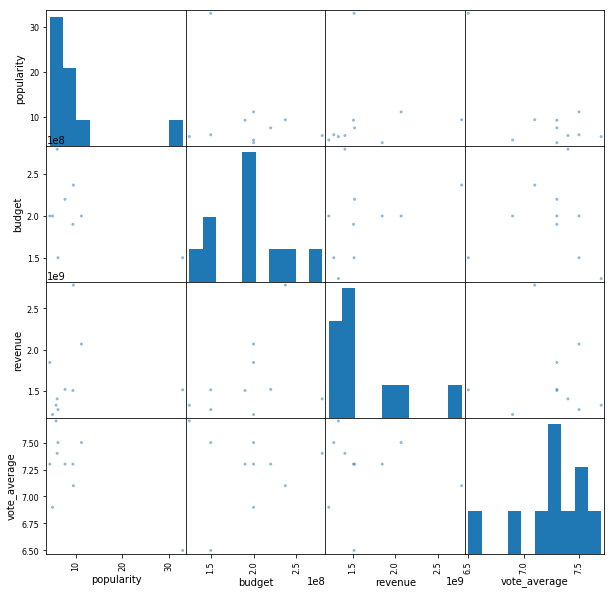

In [23]:
# Scatter matrix plot to find correlation
pd.plotting.scatter_matrix(new_df_rev,figsize=(10,10));

In [24]:
# Finding correlation
new_df_rev.corr()

,popularity,budget,revenue,vote_average
popularity,1.000000,-0.297537,0.056189,-0.727505
budget,-0.297537,1.000000,0.361870,-0.012767
revenue,0.056189,0.361870,1.000000,-0.061257
vote_average,-0.727505,-0.012767,-0.061257,1.000000


> Top 10 movies with highest revenue had popularity between 5-11 except an outlier i.e jurassic world with 33. A common mean should not be calculated as the difference between the popularity of jurassic world and others is 3 times
>The average budget of highest revenue movies was approx 2 billion along with a user ratings of 7.25. Also, the budget was low but revenue was high.
> Also, it can be said that genres of movies with most revenue included Action,Adventrue and Science Fiction in the genres.
> From the scatter matrix plot it can be said that the values are indepent in nature (are not correlated).

### Research Question 3: Is there a relationship between popularity and revenue

In [25]:
# Slicing the dataFrame to select revene and popularity columns and 2 outlies were removed using numpy slicing
df_q3 = df.iloc[2:,np.r_[:1,2]]

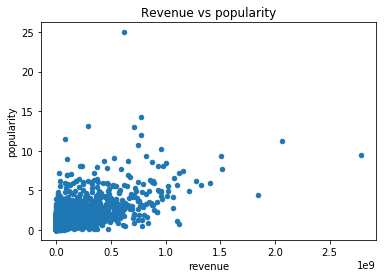

In [28]:
# plotting Revenue and Popularity
df_q3.plot(x = 'revenue', y='popularity', kind = 'scatter');
plt.title('Revenue vs popularity');

In [29]:
# Finding relation between revenue and popularity
df_q3.corr()

,popularity,revenue
popularity,1.000000,0.680498
revenue,0.680498,1.000000


> From the above the graphs and correrlation matrix it can be said that popularity is co related with revenue, also increase or decrease in populariyt there will be similar effect on revenue.

<a id='conclusions'></a>
## Conclusions

> We saw that year has an effect on different types of genres, over the time the genres has changed.
> It can be concluded that revenue and popularity of a movie are related as we saw in research question 3.
>Revenue does have some effect on popularity, ratings and even genres as some genres movies had higher revenue. Also, when taken in to account with other aspects like rating, budget together they are not much related to each other.

## Limitations: 
> We are not aware of how popularity, vote count, average vote are calculated. Also, it can't be said that the data is 100% accurate and as null were dropped in our analysis, different results would come if nulls were handled in different ways. 
> Also, the currency conversion needs to be done as the adj column currency is in 2010 US dollar price, budget and revenue as for better calculation all columns need to be in same currency.
